# North-South (NS) Line: Passenger Flow Analysis

**Objective:** To analyze the hourly passenger flow data for the NS line, identify peak and off-peak periods, and uncover behavioral patterns among its stations.

### 1. Setup and Imports

In [17]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Add the scripts directory to the Python path to import our custom module
scripts_path = "../scripts"
sys.path.append(scripts_path)

In [19]:
# Import all our custom functions
import passenger_flow_utils as pfu

# Configure pandas display options
pd.set_option('display.max_rows', 100)

### 2. Configuration
Define the main variables for this analysis.

In [20]:
# --- Main Configuration ---
FILE_PATH = '../data/NS-Passenger flow-station-hour.csv'
LINE_PREFIX = 'NS'                                    
LINE_NAME = 'North-South Line'                        

### 3. Data Loading and Initial Exploration
Load the dataset and perform an initial inspection.

In [21]:
# Load the data using our utility function
df_ns = pfu.load_and_prepare_data(FILE_PATH, LINE_PREFIX)

print("--- First 5 Rows ---")
display(df_ns.head())

print("\n--- Data Info ---")
df_ns.info()

--- First 5 Rows ---


,Station,NS6,NS7,NS8,NS9,NS10,NS11,NS12,NS13,NS14,NS15,NS21,NS22,NS23,NS24,NS25,NS26,NS27
0,6:00am to 7:00am,210,120,131,100,71,89,72,85,70,50,31,38,247,305,201,15,215
1,7:00am to 8:00am,620,254,454,202,87,110,87,62,45,70,50,61,163,290,221,55,612
2,8:00am to 9:00am,405,166,336,252,109,160,121,68,38,40,101,50,156,405,315,31,335
3,9:00am to 10:00am,345,64,229,174,61,88,13,9,5,80,42,42,80,330,266,26,282
4,10:00am to 11:00am,94,70,45,23,11,21,11,8,5,60,54,23,95,261,175,34,75



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  16 non-null     object
 1   NS6      16 non-null     int64 
 2   NS7      16 non-null     int64 
 3   NS8      16 non-null     int64 
 4   NS9      16 non-null     int64 
 5   NS10     16 non-null     int64 
 6   NS11     16 non-null     int64 
 7   NS12     16 non-null     int64 
 8   NS13     16 non-null     int64 
 9   NS14     16 non-null     int64 
 10  NS15     16 non-null     int64 
 11  NS21     16 non-null     int64 
 12  NS22     16 non-null     int64 
 13  NS23     16 non-null     int64 
 14  NS24     16 non-null     int64 
 15  NS25     16 non-null     int64 
 16  NS26     16 non-null     int64 
 17  NS27     16 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 2.4+ KB


### 4. Data Cleaning and Validation
Check for missing values, duplicates, and any data anomalies.

In [ ]:
# Perform basic checks for nulls, dtypes, and stats
pfu.basic_checks(df_ns)

--- Shape ---
(16, 19)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Station    16 non-null     object
 1   NS6        16 non-null     int64 
 2   NS7        16 non-null     int64 
 3   NS8        16 non-null     int64 
 4   NS9        16 non-null     int64 
 5   NS10       16 non-null     int64 
 6   NS11       16 non-null     int64 
 7   NS12       16 non-null     int64 
 8   NS13       16 non-null     int64 
 9   NS14       16 non-null     int64 
 10  NS15       16 non-null     int64 
 11  NS21       16 non-null     int64 
 12  NS22       16 non-null     int64 
 13  NS23       16 non-null     int64 
 14  NS24       16 non-null     int64 
 15  NS25       16 non-null     int64 
 16  NS26       16 non-null     int64 
 17  NS27       16 non-null     int64 
 18  TotalFlow  16 non-null     int64 
dtypes: int64(18), object(1)
memory usage

In [ ]:
# Check for any duplicate time slot entries
duplicate_rows = df_ns.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows}")

Number of duplicate rows found: 0


In [ ]:
# Check for anomalies like negative passenger counts
numeric_cols = df_ns.select_dtypes(include='number')
negative_values = (numeric_cols < 0).sum().sum()
print(f"Number of negative passenger counts found: {negative_values}")

Number of negative passenger counts found: 0


### 5. Feature Engineering
Create the `TotalFlow` column to represent the total passenger volume for each time slot.

In [ ]:
# Add the 'TotalFlow' column for analysis
df_ns = pfu.add_total_flow(df_ns)

print("--- Dataframe with TotalFlow ---")
display(df_ns[['TotalFlow']].head())

--- Dataframe with TotalFlow ---


,TotalFlow
0,4100
1,6886
2,6176
3,4272
4,2130


### 6. Exploratory Data Analysis (EDA) & Visualization

#### What are the busiest and least busy times on the EW line?

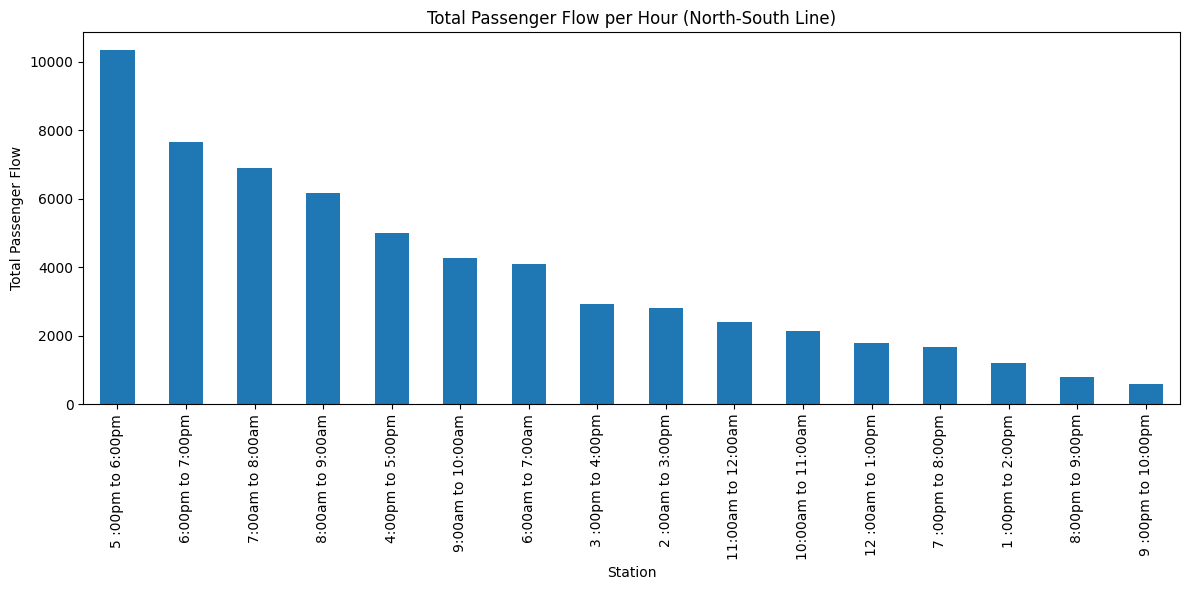

In [ ]:
# Plot the total flow per time slot
pfu.plot_total_flow_per_station(
    df_ns,
    title=f'Total Passenger Flow per Hour ({LINE_NAME})'
)

**Insight:** The NS line also shows a bimodal distribution, but its primary peak is in the evening (5:00-6:00 pm), which is much more pronounced than its morning peak. This suggests a different primary commuter direction or type compared to the NS line.

#### Which station codes contribute most to the passenger flow?

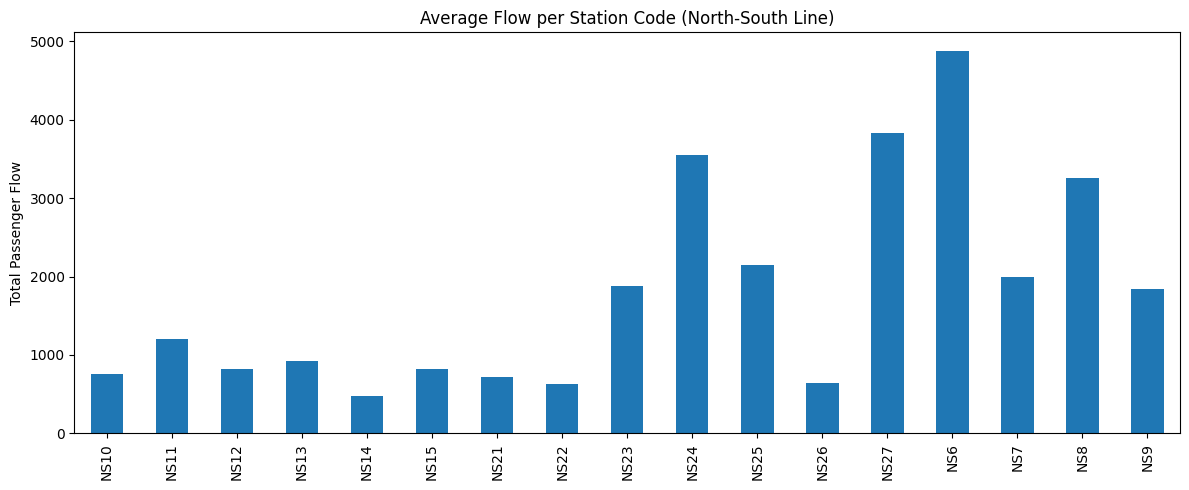

In [ ]:
pfu.plot_flow_by_column(
    df_ns,
    title=f'Average Flow per Station Code ({LINE_NAME})'
)

### 7. Advanced Analysis: Identifying Patterns

#### Passenger Flow Heatmap
This heatmap visualizes flow intensity across all hours and station codes, making it easy to spot patterns.

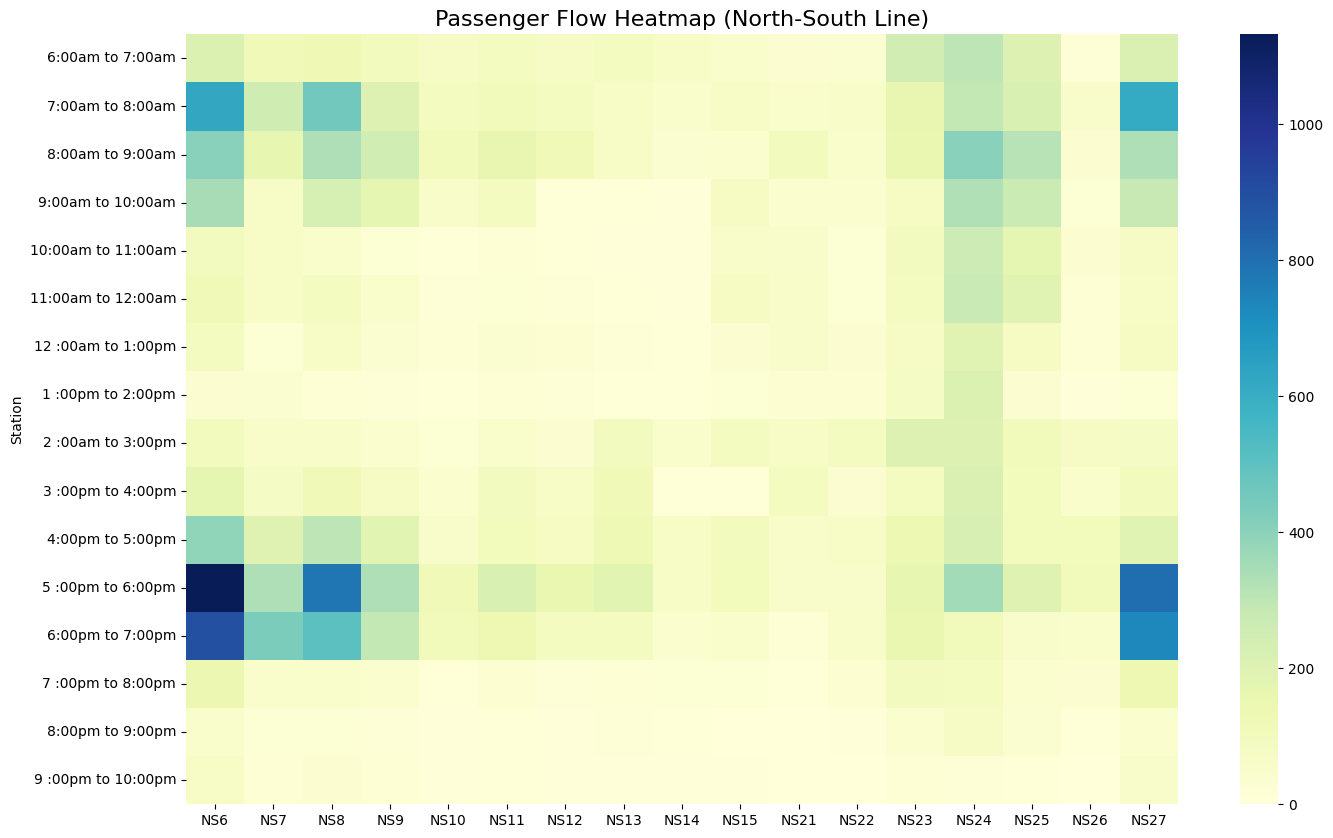

In [ ]:
pfu.plot_flow_heatmap(
    df_ns,
    title=f'Passenger Flow Heatmap ({LINE_NAME})'
)

**Insight:** The heatmap reinforces the bimodal pattern. The bright yellow blocks clearly show the morning and evening peaks. We can also see which specific station codes (e.g., NS1, NS22) are busiest during these times.

### Directional Flow Analysis by Zone
Objective: To visualize the "tidal flow" of commuters by grouping stations into geographical zones and comparing their aggregate passenger activity throughout the day. This serves as a proxy for understanding the "going to work" versus "returning home" patterns.

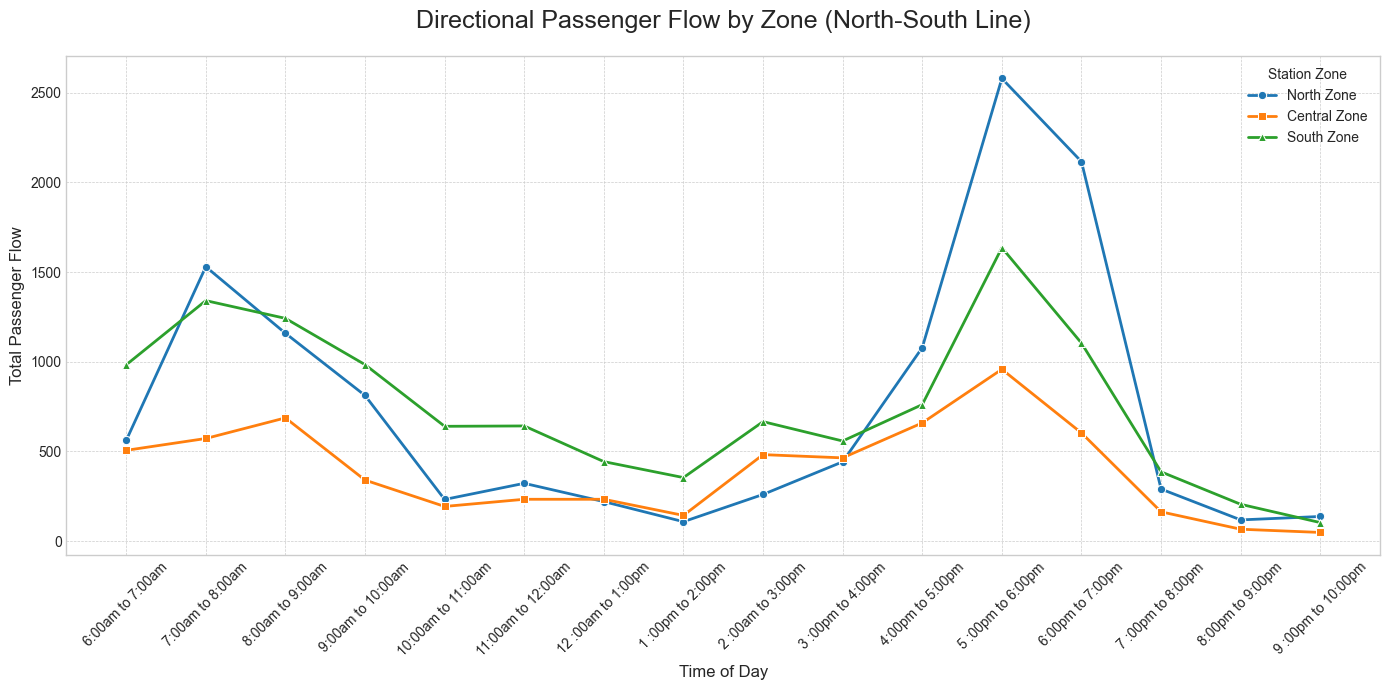

In [32]:
# --- 1. Define Station Zones for the NS Line ---
# We'll group stations geographically to represent different parts of the line.
ns_north_stations = ['NS6', 'NS7', 'NS8', 'NS9']
ns_central_stations = ['NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS21', 'NS22']
ns_south_stations = ['NS23', 'NS24', 'NS25', 'NS26', 'NS27']

# --- 2. Calculate Aggregate Flow per Zone ---
df_ns_zonal = pd.DataFrame()
df_ns_zonal['Time'] = df_ns['Station']
df_ns_zonal['North Zone Flow'] = df_ns[ns_north_stations].sum(axis=1)
df_ns_zonal['Central Zone Flow'] = df_ns[ns_central_stations].sum(axis=1)
df_ns_zonal['South Zone Flow'] = df_ns[ns_south_stations].sum(axis=1)

# --- 3. Visualize the Zonal Flow ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=df_ns_zonal, x='Time', y='North Zone Flow', label='North Zone', marker='o', lw=2)
sns.lineplot(data=df_ns_zonal, x='Time', y='Central Zone Flow', label='Central Zone', marker='s', lw=2)
sns.lineplot(data=df_ns_zonal, x='Time', y='South Zone Flow', label='South Zone', marker='^', lw=2)

ax.set_title(f'Directional Passenger Flow by Zone ({LINE_NAME})', fontsize=18, pad=20)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Total Passenger Flow', fontsize=12)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(title='Station Zone')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Bimodal Passenger Flow Pattern – EW Line

### 1. What is a Bimodal Pattern?
A **bimodal pattern** shows two daily peaks in passenger flow:
- **Morning Peak (~8 AM):** People going to work (Ends → Center)
- **Evening Peak (~5 PM):** People going back home (Center → Ends)

This pattern happens because of directional commuting flow.

---

### 2. Data Challenge
Our dataset (`EW-Passenger flow-station-hour.csv`) only shows **total station activity per hour**.
It does **NOT** specify:
- **Entries vs. Exits**
- **Travel Direction** (E→W or W→E)

A full Origin-Destination (OD) matrix would help, but we don’t have it.

---

### 3. Solution: Zonal Grouping as a Proxy
We grouped stations into:
- **End Zones (Residential)**
- **Center Zone (Commercial)**

This helps infer direction:
- **Morning:** High activity at Ends → inbound to Center
- **Evening:** High activity at Center → outbound to Ends

Thus, we can visualize the “going” and “returning” flows and explain the bimodal pattern even with limited data.


#### 7.2. Station Clustering by Flow Pattern
Using KMeans clustering, we can group stations that exhibit similar ridership patterns throughout the day. This helps identify stations that serve similar functions (e.g., residential hubs, commercial centers).

We will analyze this in two ways:
1.  **Clustering stations (columns)** based on their hourly flows.
2.  **Clustering time slots (rows)** based on their cross-station traffic.

C:\Users\helin\AppData\Local\Temp\ipykernel_29572\4167719512.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(df_ew_for_station_clustering['pca1'][i] + 0.1, df_ew_for_station_clustering['pca2'][i], station, fontsize=9)
C:\Users\helin\AppData\Local\Temp\ipykernel_29572\4167719512.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(df_ew_for_time_clustering['pca1'][i] + 0.1, df_ew_for_time_clustering['pca2'][i], timeslot, fontsize=9)


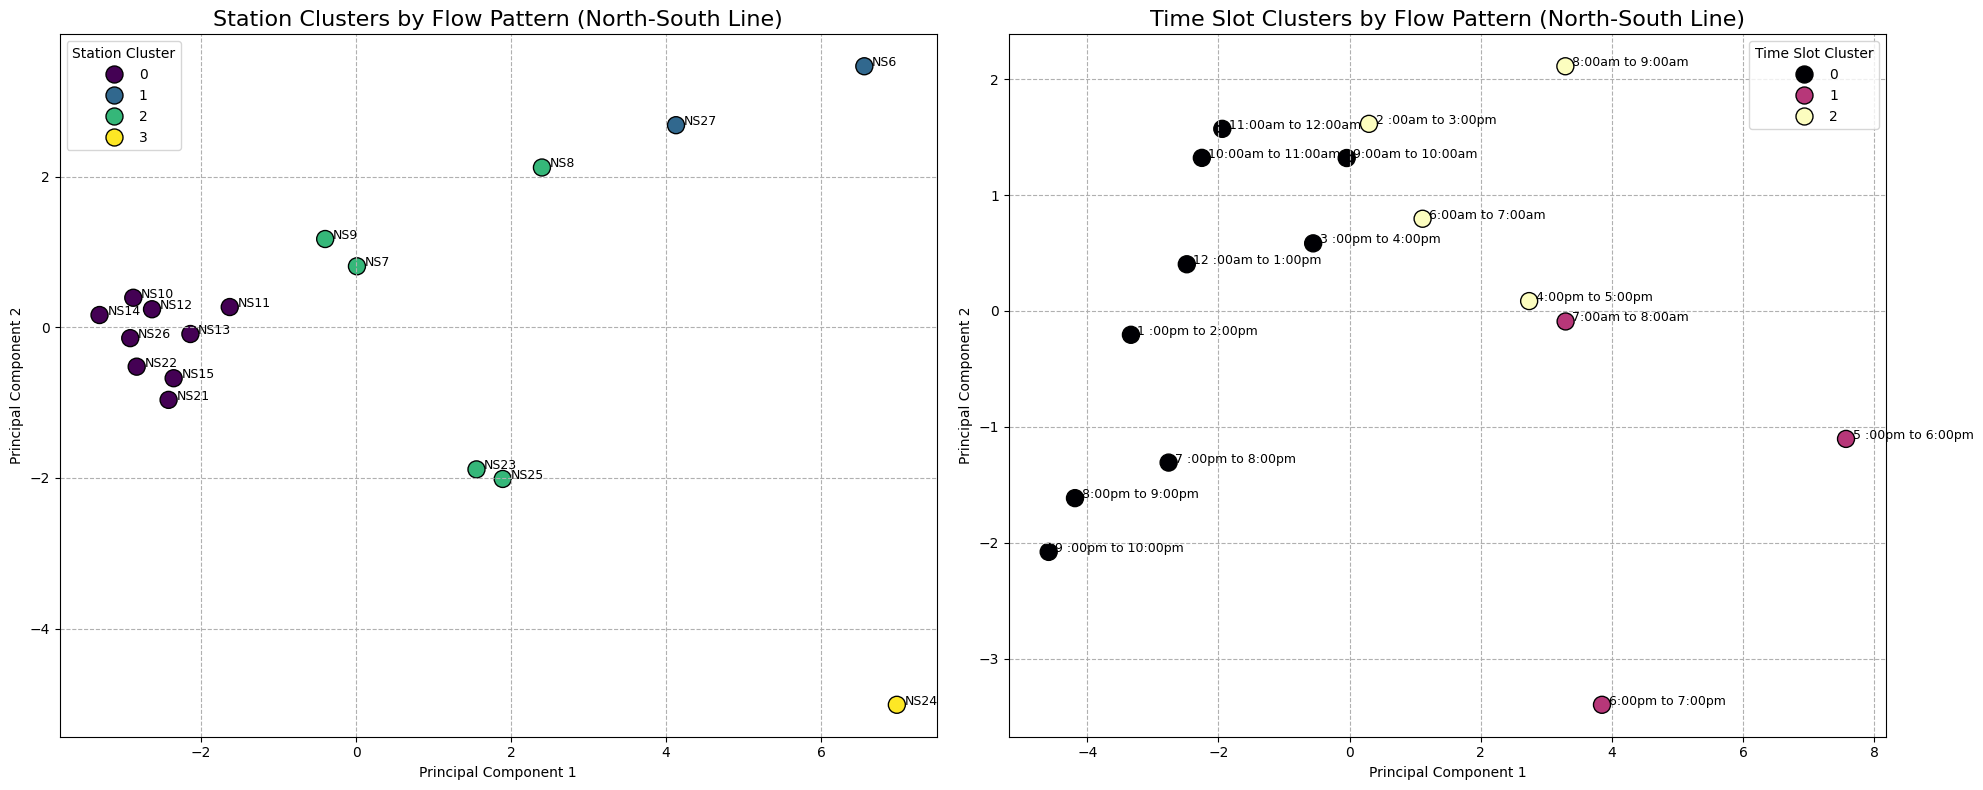

--- Stations Grouped by Behavior ---
Cluster 0: ['NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS21', 'NS22', 'NS26']
Cluster 1: ['NS6', 'NS27']
Cluster 2: ['NS7', 'NS8', 'NS9', 'NS23', 'NS25']
Cluster 3: ['NS24']

--- Time Slots Grouped by Behavior ---
Cluster 0: ['9:00am to 10:00am', '10:00am to 11:00am', '11:00am to 12:00am', '12 :00am to 1:00pm', '1 :00pm to 2:00pm', '3 :00pm to 4:00pm', '7 :00pm to 8:00pm', '8:00pm to 9:00pm', '9 :00pm to 10:00pm']
Cluster 1: ['7:00am to 8:00am', '5 :00pm to 6:00pm', '6:00pm to 7:00pm']
Cluster 2: ['6:00am to 7:00am', '8:00am to 9:00am', '2 :00am to 3:00pm', '4:00pm to 5:00pm']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CLUSTERING STATIONS (COLUMNS) ---

# Prepare the data by transposing it, so stations are rows
df_ns_for_station_clustering = df_ns.drop(columns=['Station', 'TotalFlow']).set_index(df_ns['Station']).transpose()

# Scale the hourly data for each station
scaler_station = StandardScaler()
X_stations_scaled = scaler_station.fit_transform(df_ns_for_station_clustering)

# Perform KMeans clustering (e.g., into 4 types of stations)
kmeans_stations = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_ns_for_station_clustering['Cluster'] = kmeans_stations.fit_predict(X_stations_scaled)

# Use PCA for 2D visualization
pca_stations = PCA(n_components=2)
pca_station_result = pca_stations.fit_transform(X_stations_scaled)
df_ns_for_station_clustering[['pca1', 'pca2']] = pca_station_result


# --- 2. CLUSTERING TIME SLOTS (ROWS) ---

# Prepare the data with time slots as rows
df_ns_for_time_clustering = df_ns.drop(columns=['TotalFlow']).set_index('Station')

# Scale the station flow data for each hour
scaler_time = StandardScaler()
X_time_scaled = scaler_time.fit_transform(df_ns_for_time_clustering)

# Perform KMeans clustering (e.g., into 3 types of hours: peak, off-peak, shoulder)
kmeans_time = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_ns_for_time_clustering['Cluster'] = kmeans_time.fit_predict(X_time_scaled)

# Use PCA for 2D visualization
pca_time = PCA(n_components=2)
pca_time_result = pca_time.fit_transform(X_time_scaled)
df_ns_for_time_clustering[['pca1', 'pca2']] = pca_time_result


# --- VISUALIZATION ---

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot Station Clusters
sns.scatterplot(data=df_ns_for_station_clustering, x='pca1', y='pca2', hue='Cluster', palette='viridis', s=150, ax=ax1, edgecolor='black')
ax1.set_title(f'Station Clusters by Flow Pattern ({LINE_NAME})', fontsize=16)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend(title='Station Cluster')
ax1.grid(True, linestyle='--')
for i, station in enumerate(df_ns_for_station_clustering.index):
    ax1.text(df_ns_for_station_clustering['pca1'][i] + 0.1, df_ns_for_station_clustering['pca2'][i], station, fontsize=9)

# Plot Time Slot Clusters
sns.scatterplot(data=df_ns_for_time_clustering, x='pca1', y='pca2', hue='Cluster', palette='magma', s=150, ax=ax2, edgecolor='black')
ax2.set_title(f'Time Slot Clusters by Flow Pattern ({LINE_NAME})', fontsize=16)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend(title='Time Slot Cluster')
ax2.grid(True, linestyle='--')
for i, timeslot in enumerate(df_ns_for_time_clustering.index):
    ax2.text(df_ns_for_time_clustering['pca1'][i] + 0.1, df_ns_for_time_clustering['pca2'][i], timeslot, fontsize=9)

plt.tight_layout()
plt.show()

# --- Display Cluster Contents ---
print("--- Stations Grouped by Behavior ---")
for i in range(4):
    stations = df_ns_for_station_clustering[df_ns_for_station_clustering['Cluster'] == i].index.tolist()
    print(f"Cluster {i}: {stations}")

print("\n--- Time Slots Grouped by Behavior ---")
for i in range(3):
    timeslots = df_ns_for_time_clustering[df_ns_for_time_clustering['Cluster'] == i].index.tolist()
    print(f"Cluster {i}: {timeslots}")

### 8. Summary of Findings

In [ ]:
# Get busiest and least busy time slots
top_stations, bottom_stations = pfu.get_top_bottom_stations(df_ns, n=5)

print(f"--- Top 5 Busiest Hours ({LINE_NAME}) ---")
display(top_stations)

print(f"\n--- Top 5 Least Busy Hours ({LINE_NAME}) ---")
display(bottom_stations)

--- Top 5 Busiest Hours (North-South Line) ---


,Station,TotalFlow
11,5 :00pm to 6:00pm,10348
12,6:00pm to 7:00pm,7646
1,7:00am to 8:00am,6886
2,8:00am to 9:00am,6176
10,4:00pm to 5:00pm,4998



--- Top 5 Least Busy Hours (North-South Line) ---


,Station,TotalFlow
6,12 :00am to 1:00pm,1792
13,7 :00pm to 8:00pm,1678
7,1 :00pm to 2:00pm,1210
14,8:00pm to 9:00pm,778
15,9 :00pm to 10:00pm,576


In [ ]:
# Create the full summary table
summary_table = pfu.create_summary_table(df_ns)

print(f"\n--- Full Summary Table ({LINE_NAME}) ---")
display(summary_table.head())


--- Full Summary Table (North-South Line) ---


,Station,Total Flow,Busiest Code,Least Used Code
0,5 :00pm to 6:00pm,10348,NS6,NS22
1,6:00pm to 7:00pm,7646,NS6,NS21
2,7:00am to 8:00am,6886,NS6,NS14
3,8:00am to 9:00am,6176,NS6,NS26
4,4:00pm to 5:00pm,4998,NS6,NS10


### 9. Conclusion for NS Line

The East-West Line analysis reveals:
- **Strong Commuter Focus:** A clear bimodal pattern with a dominant morning peak.
- **Key Hubs:** Stations like `NS1` and `NS22` are major drivers of passenger traffic.
- **Predictable Lulls:** Midday and late-evening periods show significantly lower traffic, offering opportunities for operational adjustments.